# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import random
# Libraries

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
from random import randint

def roll_dice(times):
    roll = [random.randint(1, 6) for x in range(times)]
    return roll

df = pd.DataFrame(roll_dice(10))
df.rename(columns={0: 'value'}, inplace=True)
df

,value
0,3
1,3
2,1
3,6
4,5
5,5
6,3
7,2
8,6
9,2


#### 2.- Plot the results sorted by value.

<AxesSubplot:>

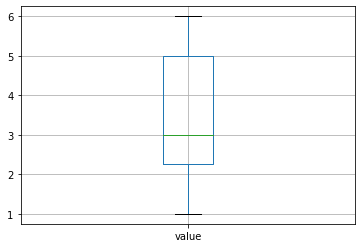

In [3]:
df.sort_values('value').boxplot()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [4]:
# your code here
frequency_distri=df['value'].value_counts()
frequency_distri

3    3
2    2
5    2
6    2
1    1
Name: value, dtype: int64

<AxesSubplot:>

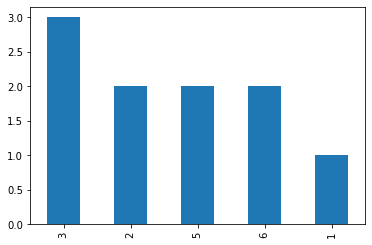

In [16]:
df['value'].value_counts().plot(kind='bar')

In [ ]:
"""
your comments here
from the 1st plot, we can see 3 is the mean and in the second, 
3 is the mode. mode and mean are equivalent here
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [88]:
# your code here
def reset_df_indexes(df):
    df = df.reset_index(drop=True)
    df.index = range(1,len(df)+1)
    return df

def mean(df):
    return df['value'].sum() / len(df['value'])

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [17]:
# your code here
countfreq = df['value'].value_counts()
countfreq

3    3
2    2
5    2
6    2
1    1
Name: value, dtype: int64

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [ ]:
# your code here
def median_calculation(df):
    if len(df['value']) % 2 == 0:
        return (df['value'][len(df) // 2] + df['value'][(len(df) // 2) + 1]) / 2
    return df['value'][(len(df) // 2) + 1]

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [ ]:
# your code here
def quartiles_calculation(df):
    Q2 = median_calculation(df)
    index = len(sorted_dice_results['value']) // 2
    if len(df['value']) % 2 == 0:
        lower_df = df.iloc[0:index]
        upper_df = df.iloc[index:]
    else:
        lower_df = df.iloc[0:index-1]
        upper_df = df.iloc[index+1:]
    upper_df = reset_df_indexes(upper_df)
    Q1 = median_calculation(lower_df)
    Q3 = median_calculation(upper_df)
    return Q1,Q2,Q3

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

Text(0.5, 1.0, 'Distribution of roll value')

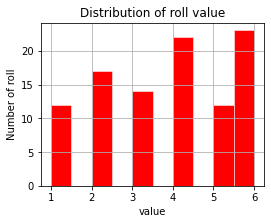

In [6]:
# your code here
roll_the_dice_hundred = pd.read_csv(r'C:\Users\ouykh\Downloads\roll_the_dice_hundred.csv')
s=roll_the_dice_hundred.sort_values('value')
s.hist(column='value',figsize=(4,3),color="r",linewidth=0.5, edgecolor="white")
plt.xlabel('value')
plt.ylabel('Number of roll')
plt.title('Distribution of roll value')

In [ ]:
"""
your comments here
results 6 and 4 are more frequent
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [89]:
# your code here
roll_the_dice_hundred.head(2)
mean(roll_the_dice_hundred)

3.74

#### 3.- Now, calculate the frequency distribution.


In [13]:
# your code here
freq_dist=roll_the_dice_hundred.groupby(['value'])['roll'].count()
freq_dist

value
1    12
2    17
3    14
4    22
5    12
6    23
Name: roll, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:>

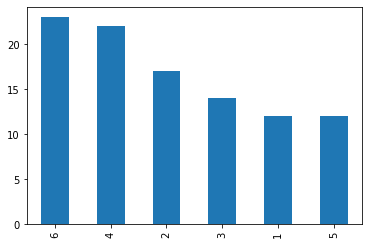

In [18]:
# your code here
roll_the_dice_hundred['value'].value_counts().plot(kind='bar')

In [ ]:
"""
your comments here
the mean appears in the middle
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<AxesSubplot:>

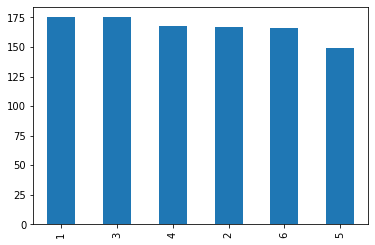

In [19]:
# your code here
roll_the_dice_thousand = pd.read_csv(r'C:\Users\ouykh\Downloads\roll_the_dice_thousand.csv')
roll_the_dice_thousand.head()
roll_the_dice_thousand['value'].value_counts().plot(kind='bar')

In [ ]:
"""
your comments here
the values results are equally spread here
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [28]:
# your code here
ages_population = pd.read_csv(r'C:\Users\ouykh\Downloads\ages_population.csv')
ages_population.value_counts()

observation
39.0           45
41.0           36
30.0           34
35.0           33
43.0           32
               ..
69.0            1
70.0            1
71.0            1
73.0            1
82.0            1
Length: 72, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

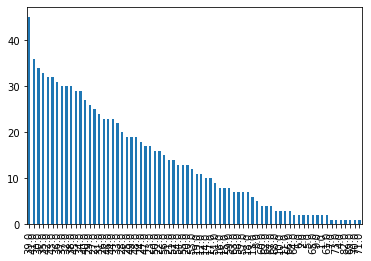

In [27]:
ages_population['observation'].value_counts().plot(kind='bar')

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [100]:
# your code here
ages_population.mean()

observation    36.56
dtype: float64

In [102]:
ages_population.std()

observation    12.8165
dtype: float64

In [ ]:
"""
your comments here
as seen on the plot, the st deviation is significant
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [24]:
# your code here
ages_population2 = pd.read_csv(r'C:\Users\ouykh\Downloads\ages_population2.csv')
ages_population2.value_counts()

observation
28.0           139
27.0           125
26.0           120
29.0           115
25.0            98
30.0            90
24.0            78
31.0            61
23.0            41
22.0            35
32.0            31
33.0            22
21.0            17
20.0            13
34.0             7
35.0             3
19.0             3
36.0             2
dtype: int64

<AxesSubplot:>

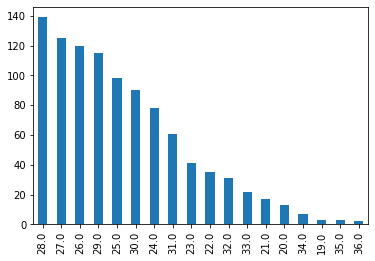

In [25]:
ages_population2['observation'].value_counts().plot(kind='bar')

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
this second sample is less spread than the first
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [103]:
# your code here
ages_population2.mean()

observation    27.155
dtype: float64

In [104]:
ages_population2.std()

observation    2.969814
dtype: float64

In [ ]:
"""
your comments here
standard deviation is definitively small
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [29]:
# your code here
ages_population3 = pd.read_csv(r'C:\Users\ouykh\Downloads\ages_population3.csv')

In [30]:
ages_population3.value_counts()

observation
32.0           37
37.0           31
35.0           31
39.0           29
36.0           26
               ..
8.0             1
7.0             1
5.0             1
76.0            1
1.0             1
Length: 75, dtype: int64

<AxesSubplot:>

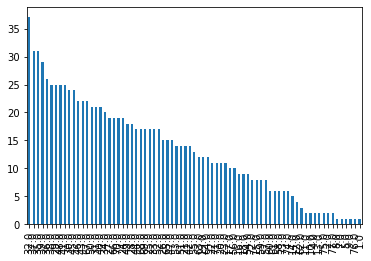

In [31]:
ages_population3['observation'].value_counts().plot(kind='bar')

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [32]:
# your code here
print('mean =', ages_population3.mean())
print('std =',ages_population3.std())

mean = observation    41.989
dtype: float64
std = observation    16.144706
dtype: float64


In [ ]:
"""
your comments here
mean and std aren't that far from each other and the plots looks alike 
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [33]:
# your code here
ages_population3.observation.quantile([0.25,0.5,0.75])

0.25    30.0
0.50    40.0
0.75    53.0
Name: observation, dtype: float64

In [ ]:
"""
your comments here
the difference between the median and mean is quite small
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""